In [5]:
import matplotlib.pyplot as plt
import pandas as pandas
import numpy as numpy
import seaborn as sns

## dimensionality reduction on phone data.

Here we first check out the csv then we align it to zero and use svd to find the vectors that explain the most variance.

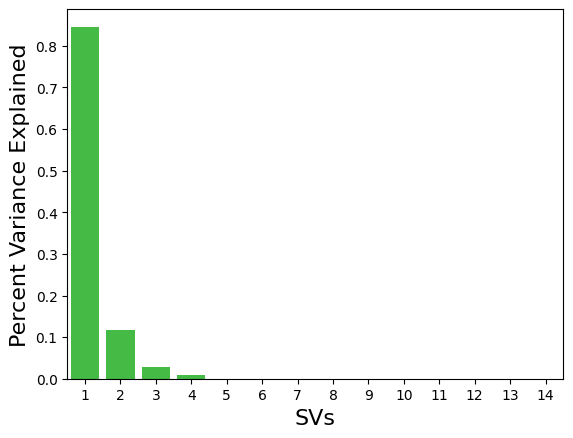

In [12]:
data = pandas.read_csv("Cellphone.csv")

data.head

data.apply(lambda x: x-x.mean())
	
eig_vectors, eig_values, v = numpy.linalg.svd(data, full_matrices=True)

var_explained = numpy.round(eig_values**2/numpy.sum(eig_values**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)



Here i would like to visualise the data based on a graph showing the 1 principal component and the price of the product. i dont quite know how yet.

In [16]:
idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx][:2]
eig_vectors = eig_vectors[:, idx][:, :2]
X = data

# 5. Project the data onto principal components
X_transformed = numpy.dot(X, eig_vectors)

# Get the explained variance ratio
explained_variance_ratio = eig_values / numpy.sum(eig_values)

# 6. Check that everything is correct with scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
assert numpy.allclose(numpy.abs(pca.components_), numpy.abs(eig_vectors.T)) # it's the same!

# 7. Plot the data
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(eig_vectors.T, eig_values)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()


ValueError: shapes (161,14) and (161,2) not aligned: 14 (dim 1) != 161 (dim 0)